In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True
plt.rcParams['axes.linewidth']=1.5

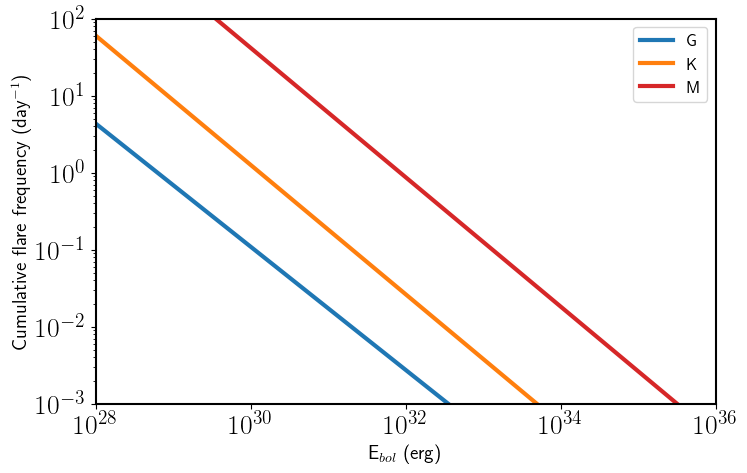

In [3]:
# M & K dwarf FFD

# Howard+2019 for active M2 and K5 dwarfs (assumed representative for all M's and K's)
# log nu = alpha * log E_bol + beta
# nu is the cumulative flare frequency (per day)

e_bol = np.logspace(27,40,1000) # bolometric flare energy array you can change this range 
#lowest flare energy TESS will be sensitive to, I think might be 10** 26 erg?? (need to double check that in literature)
                                       
        
beta_M = 26.82
alpha_M = -0.84

#beta_K = 44.55
#alpha_K = -1.34 # This is so steep at low flare energies it causes memory problems!
alpha_K = -0.84 # so I made the K dwarf FFD intermediate to the M and G dwarf FFDs
beta_K = 25.3

nu_M = 10**beta_M * (e_bol)**alpha_M
nu_K = 10**beta_K * (e_bol)**alpha_K





# G dwarf FFD

# Shibayama+ 2013 Figure 9 - a fit to all G dwarfs (Sun included)
# The form of this FFD is 
# log dN/dE = alpha * log E_bol + beta, where dN/dE has units erg^-1 star^-1 yr^-1, 
# so I'll have to multiply by the energy array and divide by 365 days/yr to convert to day^-1
beta_G = 25.6
alpha_G = -1.8

nu_G = (10**beta_G * (e_bol)**alpha_G) * e_bol / 365.

#plt.figure()
plt.plot(e_bol, nu_G, label='G',color='C0',lw=3)
plt.plot(e_bol,nu_K,label='K',color='C1',lw=3)
plt.plot(e_bol,nu_M,label='M',color='C3',lw=3)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('E$_{bol}$ (erg)',fontsize=14)
plt.ylabel('Cumulative flare frequency (day$^{-1}$)',fontsize=14)



#accounting for age
#plt.plot(e_bol,nu_M/10,label='M',color='C5',ls='--')

plt.xlim(10e27,1e36)
plt.ylim(10e-4,1e2)
plt.legend(fontsize=12)
#plt.savefig('ffds.pdf',bbox_inches='tight')

In [4]:
energy = np.logspace(29,40,1000) # bolometric flare energy array
def nu_M(energy):
    beta = 26.82
    alpha = -0.84
    nu_M = 10**beta * (energy)**alpha
    return nu_M

def nu_K(energy):
    alpha_K = -0.84
    beta_K = 25.3
    nu_K = 10**beta_K * (e_bol)**alpha_K
    return nu_K

def nu_G(energy):
    beta_G = 25.6
    alpha_G = -1.8
    nu_G = (10**beta_G * (e_bol)**alpha_G) * e_bol / 365.
    return nu_G

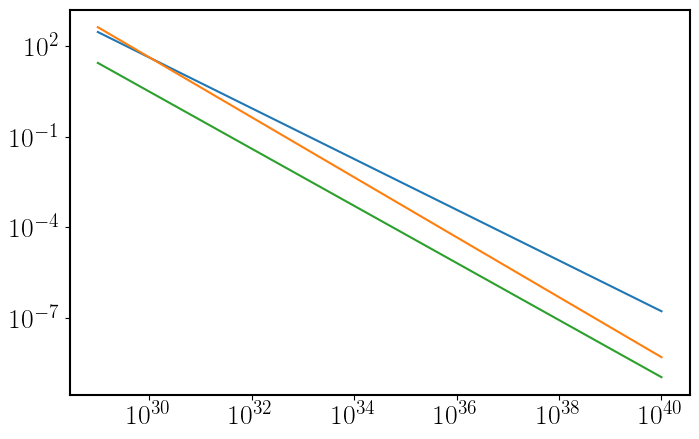

In [5]:
plt.plot((energy),nu_M(energy))
plt.plot((energy),nu_K(energy))
plt.plot((energy),nu_G(energy))
plt.yscale('log')
plt.xscale('log')

### Importing in super flare properties from Althukair et al 2023 https://arxiv.org/abs/2212.10224

In [6]:
gstars = pd.read_csv('superflares/G-type-superflares.csv')
kstars = pd.read_csv('superflares/K-type-superflares.csv')
mstars = pd.read_csv('superflares/M-type-superflares.csv')

In [7]:
#amplitudes
gstars_amps = gstars['flare_amp'].values
kstars_amps = kstars['flare_amp'].values
mstars_amps = mstars['flare_amp'].values

#flare duration in days
gstars_dur = gstars['flare_duration'].values
kstars_dur = kstars['flare_duration'].values
mstars_dur = mstars['flare_duration'].values


#energies
gstars_e = gstars['energy'].values
kstars_e = kstars['energy'].values
mstars_e = mstars['energy'].values

Text(0.5, 1.0, 'M superflares')

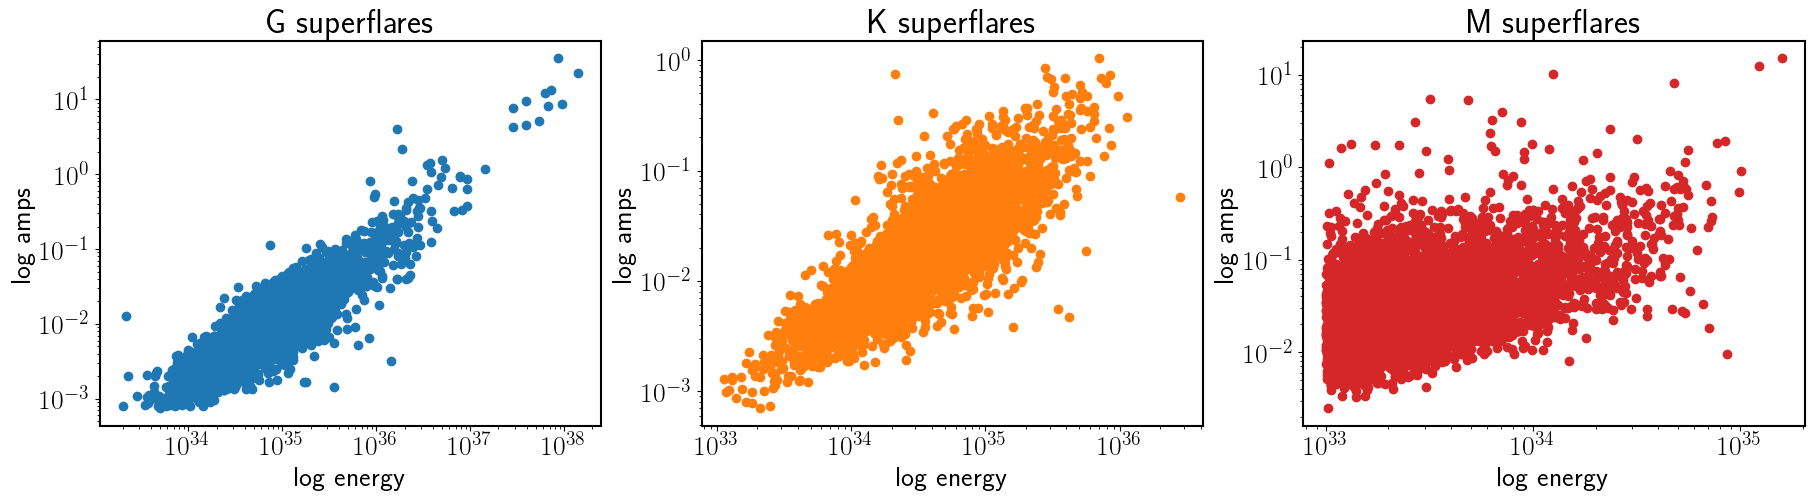

In [8]:
fig,ax=plt.subplots(1,3,figsize=(22, 5))

ax[0].scatter(gstars_e,gstars_amps,color='C0')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('log energy')
ax[0].set_ylabel ('log amps')
ax[0].set_title('G superflares')

ax[1].scatter(kstars_e,kstars_amps,color='C1')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('log energy')
ax[1].set_ylabel ('log amps')
ax[1].set_title('K superflares')

ax[2].scatter(mstars_e,mstars_amps,color='C3')
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_xlabel('log energy')
ax[2].set_ylabel ('log amps')
ax[2].set_title('M superflares')

### Fitting a line to each of the plots

In [9]:
#sort by energies

zg = np.polyfit(np.sort(np.log10(gstars_e)), np.sort(np.log10(gstars_amps)), 1)
p = np.poly1d(zg)
print(p)

zk = np.polyfit(np.sort(np.log10(kstars_e)), np.sort(np.log10(kstars_amps)), 1)
pk = np.poly1d(zk)
print(pk)

zm = np.polyfit(np.sort(np.log10(mstars_e)), np.sort(np.log10(mstars_amps)), 1)
pm = np.poly1d(zm)
print(pm)

 
0.9418 x - 34.85
 
1.034 x - 37.47
 
1.16 x - 40.28


In [10]:
print(p(gstars_e))
print(pk(gstars_e))
print(pm(gstars_e))

[2.24160090e+34 3.62611910e+34 5.72644263e+34 ... 1.57288803e+34
 1.87427974e+34 2.25101939e+34]
[2.46153149e+34 3.98188917e+34 6.28828211e+34 ... 1.72720907e+34
 2.05817128e+34 2.47187405e+34]
[2.75998419e+34 4.46468032e+34 7.05071593e+34 ... 1.93662757e+34
 2.30771788e+34 2.77158077e+34]


Text(0.5, 1.0, 'M superflares')

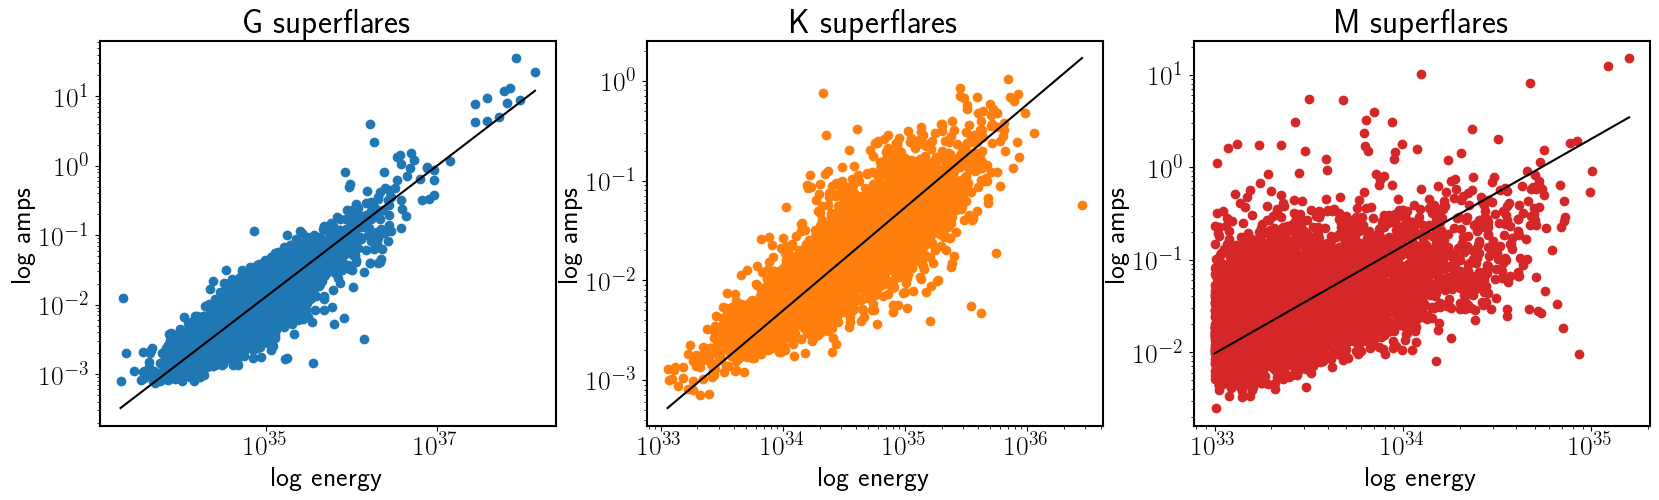

In [11]:
fig,ax=plt.subplots(1,3,figsize=(20, 5))

ax[0].scatter(gstars_e,gstars_amps,color='C0')
ax[0].plot(np.sort(gstars_e), 10**p(np.sort(np.log10(gstars_e))),color='k')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('log energy')
ax[0].set_ylabel ('log amps')
ax[0].set_title('G superflares')

ax[1].scatter(kstars_e,kstars_amps,color='C1')
ax[1].plot(np.sort(kstars_e), 10**pk(np.sort(np.log10(kstars_e))),color='k')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('log energy')
ax[1].set_ylabel ('log amps')
ax[1].set_title('K superflares')

ax[2].scatter(mstars_e,mstars_amps,color='C3')
ax[2].plot(np.sort(mstars_e), 10**pm(np.sort(np.log10(mstars_e))),color='k')
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_xlabel('log energy')
ax[2].set_ylabel ('log amps')
ax[2].set_title('M superflares')

The functions for the log fits are below (p,pk,pm for GKM stars respectively)

In [12]:
print(p)
print(pk)
print(pm)

 
0.9418 x - 34.85
 
1.034 x - 37.47
 
1.16 x - 40.28


### Calculate scatter

In [13]:
scattg =  np.std((np.sort(np.log10(gstars_amps)))/p(np.sort(np.log10(gstars_e))))
print(scattg)

scattk =  np.std((np.sort(np.log10(kstars_amps)))/pk(np.sort(np.log10(kstars_e))))
print(scattk)

scattm =  np.std((np.sort(np.log10(mstars_amps)))/pm(np.sort(np.log10(mstars_e))))
print(scattm)

0.21181312444238581
0.03938343372252946
2.4368678456146147


### Extrapolating to lower energies
example for how I did it for the M stars (will need to do something similar for G&K)

Note this code might not run out of the box since I quickly copied it over from another notebook, but hopefully it helps illustrate the approach to take!

In [14]:
from scipy.optimize import curve_fit

In [ ]:
# Fit data to linear functions
def linear_fit(x, m, b):
    return m * x + b

##### Fit AMP data with scipy curve_fit function with results from superflares data
popt_amp, covariance_amp = curve_fit(linear_fit, mstars_e, np.log10(mstars_amps))



##### Fit FWHM data 
#popt_fwhm, covariance_fwhm = curve_fit(linear_fit, results.logE, np.log10(results.fwhm))



# Generate extrapolated Energy values
extrapolated_energy    = np.logspace(25, 30, num=len(mstars_e))
extrapolated_logE      = np.log10(extrapolated_energy)



# Extrapolate AMP
extrapolated_amp       = linear_fit(extrapolated_logE, popt_amp[0], popt_amp[1])
log_scatter_values_amp = np.random.uniform(-0.5, 0.5, size=len(extrapolated_logE))
extrapolated_amp      += log_scatter_values_amp  # Add scatter to extrapolated AMP data


##### Fit AMP data with scipy curve_fit function for extrapolated data
popt_extrapolated_amp, covariance_extrapolated_amp   = curve_fit(linear_fit, extrapolated_logE, extrapolated_amp)


# comparing slopes for results data and extrapolated data
print("Slope of results.amp      : {:.4f}".format(popt_amp[0]))
print("Slope of extrapolated_amp : {:.4f}".format(popt_extrapolated_amp[0]))
print(" ")

### All of the code we walked through above in function form

In [ ]:
def get_amps(log_energy,teff=5999.,scatter=0.2):

    # log_energy is the bolometric flare energy

    threshold_mask = log_energy < 32.5

    #M 
    if teff < 3900.:
        log_amp = 1.16 * log_energy + (-40.28)
        scatter = 2.4 
        log_amp += np.random.randn(len(log_amp)) * scatter
        amp = 10**log_amp
        #the threshold mask applies to lower energy flares (e.g. extrapolation fit values)
        amp[threshold_mask] = 10 ** (0.48398594 * log_energy[threshold_mask] + (-16.98696142) + scatter*np.random.randn(sum(threshold_mask)))

    #K
    elif teff < 5300.:
        log_amp = 1.034 *log_energy +  (-37.47) 
        scatter = 0.039 
        log_amp += np.random.randn(len(log_amp)) * scatter
        amp = 10**log_amp
        
    #G
    elif teff < 6000.:
        log_amp = 0.9418 *log_energy + (-34.85)
        scatter = 0.2
        log_amp += np.random.randn(len(log_amp)) * scatter
        amp = 10**log_amp
    else:
        print('Error: Try new Teff')

    return amp

In [ ]:
def get_flare_fwhm_from_energy_and_amplitude(log_roman_E, roman_amps, stellar_L_Roman): 
    fwhm = (10**log_roman_E / 2.04087) / (roman_amps * 10**stellar_L_Roman)
    return fwhm*60. # converting units


### Bandpass Energy Calculations

The amplitudes are in the Kepler bandpass so you will need to convert to TESS! Below is what I did to convert from Kepler to Roman

In [15]:
roman_bp = pd.read_excel('Roman_effarea_20201130.xlsx',skiprows=1)
kepler_bp = pd.read_table('Kepler.csv',delimiter=' ',names=['Wavelength', 'transmission'])

In [16]:
from astropy.modeling.models import BlackBody
from astropy import units as u

In [17]:
ang_units = u.erg / (u.cm ** 2 * u.s * u.AA * u.sr)
ang_units

Unit("erg / (Angstrom cm2 s sr)")

Bolometric flux (from normalized curve, ignore units) = 4405.037266699876 Angstrom


Text(0, 0.5, 'Flux Density')

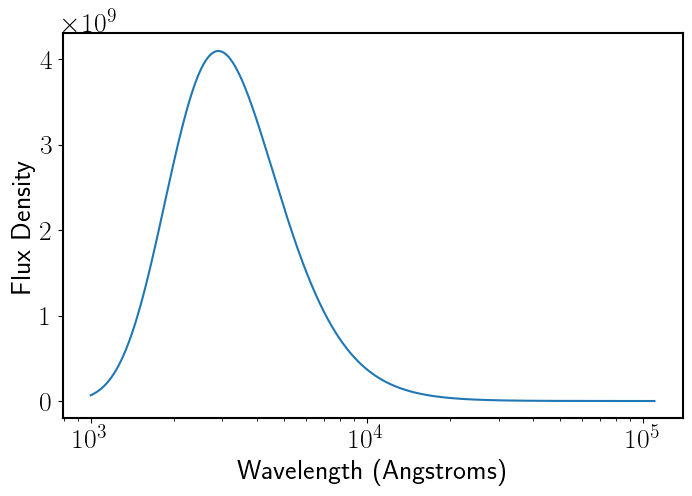

In [18]:
temperature = 10000 *u.K

bb_func = BlackBody(temperature=temperature,scale=100*ang_units)
wav = np.arange(1000, 110000) * u.AA
flux = bb_func(wav)
flux_bolo = np.trapz(flux/np.max(flux), wav)
print('Bolometric flux (from normalized curve, ignore units) = ' + str(flux_bolo))
plt.plot(wav,flux)
plt.xscale('log')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux Density')

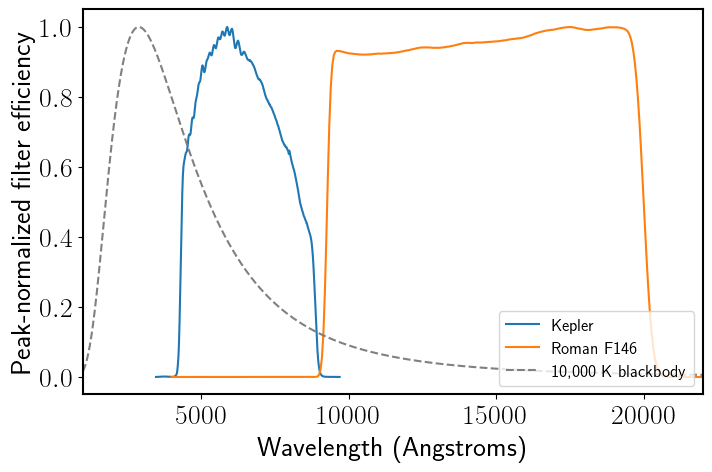

In [19]:
plt.plot(kepler_bp['Wavelength'], kepler_bp['transmission']/np.max(kepler_bp['transmission']),label='Kepler')
#plt.plot(tess['Wavelength'], tess['transmission']/np.max(tess['transmission']),label='TESS')
plt.plot(roman_bp['Wave']*1e4,roman_bp[' F146']/np.max(roman_bp[' F146']),label='Roman F146')
plt.plot(wav,flux/np.max(flux),color='grey', linestyle='--',label='10,000 K blackbody')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Peak-normalized filter efficiency')
plt.xlim([1000,22000])
plt.legend(fontsize=12,loc='lower right')

Text(0.5, 1.0, 'Kepler = 0.30651187627311094')

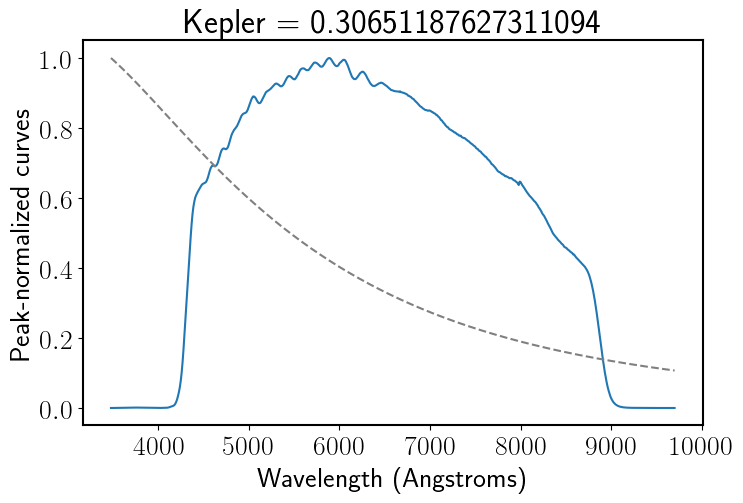

In [20]:
## Kepler bandpass
flux_kepler = bb_func(np.array(kepler_bp['Wavelength'])*u.AA)
#plt.figure()
plt.plot(kepler_bp['Wavelength'], kepler_bp['transmission']/np.max(kepler_bp['transmission']),color='C0')
plt.plot(kepler_bp['Wavelength'], flux_kepler/np.max(flux_kepler),color='grey', linestyle='--')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Peak-normalized curves')
#plt.xlim([1000,22000])
plt.title('Kepler = ' + str( np.trapz(flux_kepler/np.max(flux_kepler) * kepler_bp['transmission']/np.max(kepler_bp['transmission']), kepler_bp['Wavelength']) / flux_bolo.value) )


In [21]:
kep_bbe = np.trapz((flux_kepler/np.max(flux_kepler))* (kepler_bp['transmission']/np.max(kepler_bp['transmission'])), kepler_bp['Wavelength']) / (flux_bolo.value)
print(kep_bbe)

0.306511876273111


Text(0.5, 1.0, 'Roman F146 = 0.10406773105058177')

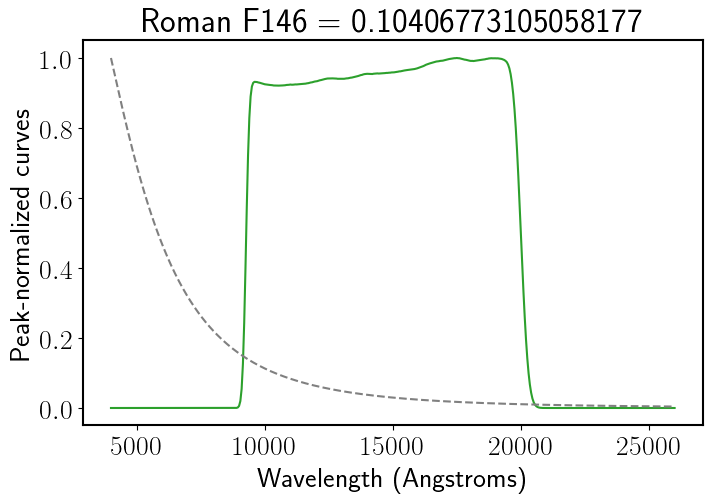

In [22]:
## Roman F146 bandpass
flux_roman = bb_func(np.array(roman_bp['Wave']*1e4)*u.AA)
plt.figure()
plt.plot(roman_bp['Wave']*1e4, roman_bp[' F146']/np.max(roman_bp[' F146']),color='C2')
plt.plot(roman_bp['Wave']*1e4, flux_roman/np.max(flux_roman),color='grey', linestyle='--')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Peak-normalized curves')
plt.title('Roman F146 = ' + str( np.trapz(flux_roman/np.max(flux_roman) * roman_bp[' F146']/np.max(roman_bp[' F146']), roman_bp['Wave']*1e4) / flux_bolo.value) )


In [23]:
roman_bbe = np.trapz((flux_roman/np.max(flux_roman))* (roman_bp[' F146']/np.max(roman_bp[' F146'])), roman_bp['Wave']*1e4) / (flux_bolo.value)
print(roman_bbe)

0.10406773105058176


In [24]:
ratio = roman_bbe/kep_bbe
print(ratio)

0.3395226714081851


In [25]:
0.3395226714081851 * (10**34)

3.3952267140818507e+33

In [26]:
def star_bandpass_conversion(temperature):
    #for a given star temp what's the star luminosity change from kepler to roman
        
    roman_bp = pd.read_excel('Roman_effarea_20201130.xlsx',skiprows=1)
    kepler_bp = pd.read_table('Kepler.csv',delimiter=' ',names=['Wavelength', 'transmission'])
    ang_units = u.erg / (u.cm ** 2 * u.s * u.AA * u.sr)
    bbtemp= temperature*u.K
    bb_func = BlackBody(temperature=bbtemp,scale=100*ang_units)
    
    wav = np.arange(1000, 110000) * u.AA
    flux = bb_func(wav)
    flux_bolo = np.trapz(flux/np.max(flux), wav)
    
    flux_kepler = bb_func(np.array(kepler_bp['Wavelength'])*u.AA)
    flux_roman =  bb_func(np.array(roman_bp['Wave']*1e4)*u.AA)
    
    kep_bbe = np.trapz((flux_kepler)* (kepler_bp['transmission']/np.max(kepler_bp['transmission'])), kepler_bp['Wavelength']) / (flux_bolo.value)
    roman_bbe = np.trapz((flux_roman)* (roman_bp[' F146']/np.max(roman_bp[' F146'])), roman_bp['Wave']*1e4) / (flux_bolo.value)
    
    roman_star_es = roman_bbe/kep_bbe
    
    return roman_star_es

In [27]:
def energy_conversion(ffd_energy,amp,teff=3500): 
    #conversion from bolometric E to Roman E
    roman_energies = 0.3395226714081851 * ffd_energy
    roman_star_es = star_bandpass_conversion(teff)
    roman_amps = amp * 0.3395226714081851 * roman_star_es
    return roman_energies, roman_amps

In [28]:
def get_flare_fwhm_from_energy_and_amplitude(roman_energies, roman_amps, stellar_L_Roman):
    fwhm = 10**roman_energies / 2.04087 / (roman_amps * 10**stellar_L_Roman) 
    return fwhm # seconds